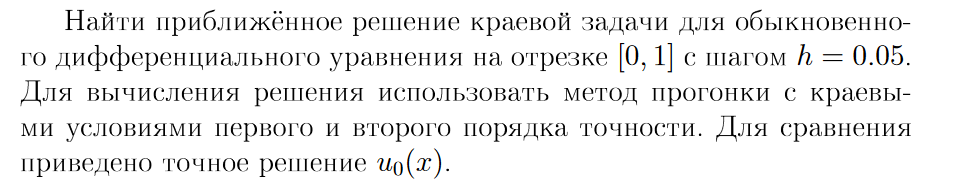

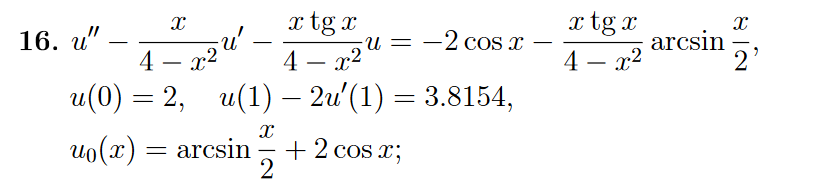

#### Метод тяжелый
Простой аналогии к работе метода а так же интуитивного оъяснения просто нету (или я не нашел).
Поэтому тут будет "тугое"и некрасивое пояснение к тому, что будет происходить дальше.
Самым простым вариантом понять что происходит, это решить более простое ОДУ с помощью этого метода.
$$
u′′(x)−u(x)​=0,\:\:\newline x∈[0,1],u(0)=0,u(1)=e^1−e^{−1}.​
$$

Реальное решение выглядит так:
$$
u(x)=e^x−e^{−x}
$$
В итоге нам необходимо получить точки, которые при соединении будут примерно давать нам кривую
решения на заданом интервале. Очевидно чем больше точек тем результат точнее, но этот пример я
делаю руками, так что ограничемся пятью включая 0 и 1.
Значит шаг у нас 0.25 а сами точки 0, 0.25, 0.5, 0.75, 1.
Теперь воспользуемся другой аппроксимацией рассмотренной в лабораторной работе №1.
(Краевые условия будут аппроксимироваться с первым и вторым порядком т.к. этого хочет задание)
$$
u′′(x) = \frac{u(x+h)−2u(x)+u(x−h)}{h^2}\newline
u(x) = u(x)
$$
Подставим это в наше уравнение:
$$
\frac{u(x+h)−2u(x)+u(x−h)}{h^2}−u(x)=0
$$
или
$$
-u(x+h)+(2+h^2)u(x)-u(x−h)=0
$$
Теперь вспомним что мы вообще-то говорим о точках, а точки это листы, а у листов есть индексы. 
Поэтому запишем наше уравнение в виде:
$$
-u_{i+1}+(2+h^2)u_i-u_{i-1}=0
$$
Отлично! Теперь у нас есть линейные уравнения, которые студент третьего курса решает и слава богу.
Запишем системку и решим ее:
$$
\begin{cases}
-u_1+(2+h^2)u_2-u_3=0\\
-u_2+(2+h^2)u_3-u_4=0\\
-u_3+(2+h^2)u_4-u_5=0\\
\end{cases}
$$
Теперь подставим в нее все что знаем:
$$
\begin{cases}
-0 + 2.0625u_1 - u_2 = 0\\
-u_1 + 2.0625u_2 - u_3 = 0\\
-u_2 + 2.0625u_3 -2.3504 = 0\\
\end{cases}
$$
Ну и собственно все, раз уж студент ее решает, то и компьютер решит.
А чтобы он ее решил за О(n) где n это кол-во уравнений, то нам нужно пользоваться методом прогонки.
Его идея в том, чтобы исходную матрицу преобразовать в треугольную (превратить все коэффициенты 
под  главной диагональю в нули) и после чего получить решение, начиная решать с нижнего уравнения.
Сделаем это один раз:
$$
a_i = [0, -1, -1] \newline
b_i = [2.0625, 2.0625, 2.0625] \newline
c_i = [-1, -1, 0] \newline
f_i = [0, 0, -2.3504]
$$
Применяем математику чтобы избавиться от a:
$$
w = \frac{a_i}{b_{i-1}} \newline
b_i = b_i - w*c_{i-1} \newline
f_i = f_i - w*f_{i-1}
$$
Получаем:
$$
a_i = [0, 0, 0] \newline
b_i = [2.0625, 1.5767, 1.4281] \newline
c_i = [-1, -1, 0] \newline
f_i = [0, 0, 2.3504]
$$
Или:
$$
\begin{cases}
2.0625u_1 - u_2 = 0\\
1.5767u_2 - u_3 = 0\\
1.4281u_3 = 2.3504\\
\end{cases}
$$
А такое решит и студент второго курса, решая "снизу вверх".


В нашем случае все сложнее, но принцип тот же:
$$
  u''(x) - \frac{x}{4 - x^2} u'(x) - \frac{x \tan x}{4 - x^2} u(x) = -2 \cos x - \frac{x \tan x}{4 - x^2} \arcsin \left( \frac{x}{2} \right), \quad x \in [0, 1]
$$

$$
  u(0) = 2, \quad u(1) - 2u'(1) = 3.8154
$$

Тогда в приближении получим:
$$
   u''(x_i) \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}\newline
   u'(x_i) \approx \frac{u_{i+1} - u_{i-1}}{2h}
$$
Подставим и получим:
$$
\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - \frac{x_i}{4 - x_i^2} \cdot \frac{u_{i+1} - u_{i-1}}{2h} - \frac{x_i \tan x_i}{4 - x_i^2} u_i = -2 \cos x_i - \frac{x_i \tan x_i}{4 - x_i^2} \arcsin \left( \frac{x_i}{2} \right)
$$
Приведем и выйдет:
$$
u_{i+1} - 2u_i + u_{i-1} - \frac{x_i h}{2(4 - x_i^2)} (u_{i+1} - u_{i-1}) - \frac{x_i h^2 \tan x_i}{4 - x_i^2} u_i = -2 h^2 \cos x_i - \frac{x_i h^2 \tan x_i}{4 - x_i^2} \arcsin \left( \frac{x_i}{2} \right)
$$
Отсюда как раз можно получить матричную систему:
$$
\begin{align*}
a_i &= 1 + \frac{x_i h}{2(4 - x_i^2)} \\
b_i &= -2 - \frac{x_i h^2 \tan x_i}{4 - x_i^2} \\
c_i &= 1 - \frac{x_i h}{2(4 - x_i^2)} \\
d_i &= -2 h^2 \cos x_i - \frac{x_i h^2 \tan x_i}{4 - x_i^2} \arcsin \left( \frac{x_i}{2} \right)
\end{align*}
$$
Теперь про краевые условия в первом порядке малости:
$$
u'(1) \approx \frac{u_{20} - u_{19}}{h}
$$

$$
u_{20} - 2 \left( \frac{u_{20} - u_{19}}{h} \right) = 3.8154
$$

$$
u_{20} \left( 1 - \frac{2}{h} \right) + \frac{2}{h} u_{19} = 3.8154 \\
\Rightarrow u_{20} = \frac{3.8154 - \frac{2}{h} u_{19}}{1 - \frac{2}{h}} \\
$$
В итоге:
$$
1 - \frac{2}{0.05} = 1 - 40 = -39 \\ \newline \newline
\Rightarrow u_{20} = \frac{3.8154 - 40 u_{19}}{-39} = \frac{40 u_{19} - 3.8154}{39}
$$
Теперь поговорим про краевые условия во втором порядке малости:
$$
u'(1) \approx \frac{3u_{20} - 4u_{19} + u_{18}}{2h}
$$
В итоге:
$$
u_{20} (0.05 - 3) + 4u_{19} - u_{18} = 3.8154 \times 0.05 \\
\Rightarrow u_{20} (-2.95) + 4u_{19} - u_{18} = 0.19077 \\
\Rightarrow u_{20} = \frac{4u_{19} - u_{18} - 0.19077}{2.95}
$$
Теперь, когда у нас есть все компоненты матрицы, давайте ее соберем:
- **Нижная диагоняль (a):**  $( a_1, a_2, \ldots, a_{19} )$
- **Главная диагональ (b):**  $( b_1, b_2, \ldots, b_{19} )$
- **Верхняя диагональ (c):**  $( c_1, c_2, \ldots, c_{19} )$
- **Свободные члены (d):**  $( d_1, d_2, \ldots, d_{19} )$

Последние уравнения у нас будут разными в зависимости от выбраного порядка малости. Разберем первый:
$$
\alpha u_{18} + \beta u_{19} = \gamma
$$
где

$$
\alpha = a_{19} \\
\beta = b_{19} + \frac{40c_{19}}{39} \\
\gamma = d_{19} + \frac{3.8154c_{19}}{39}
$$
Во втором выходит так:
$$

\alpha u_{18} + \beta u_{19} = \gamma

$$
где

$$
\alpha = a_{19} - \frac{c_{19}}{2.95} \\
\beta = b_{19} + \frac{4c_{19}}{2.95} \\
\gamma = d_{19} + \frac{0.19077c_{19}}{2.95}

$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# импорты

def solution(x):
    return np.arcsin(x / 2) + 2 * np.cos(x)
# Само решение

def p(x):
    return x / (4 - x**2)

def q(x):
    return x * np.tan(x) / (4 - x**2)

def f_rhs(x):
    return -2 * np.cos(x) - q(x) * np.arcsin(x / 2)
# А тут три функции которые составляют собой начальное ОДУ, они разбиты на три чтобы не городить
# одну большую функцию

In [2]:
def sweep(a, b, c, d):
    n = len(d)
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)

    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n-1):
        denom = b[i] - a[i] * c_prime[i-1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i] * d_prime[i-1]) / denom

    d_prime[-1] = (d[-1] - a[-1] * d_prime[-2]) / (b[-1] - a[-1] * c_prime[-2])

    u = np.zeros(n)
    u[-1] = d_prime[-1]
    for i in range(n-2, -1, -1):
        u[i] = d_prime[i] - c_prime[i] * u[i+1]

    return u

In [3]:
def first_order(x, a_coeff, b_coeff, c_coeff, d_coeff):
    N = len(x) -1  
    a19 = a_coeff[-1]
    b19 = b_coeff[-1]
    c19 = c_coeff[-1]
    d19 = d_coeff[-1]

    alpha = a19
    beta = b19 + (40 * c19) /39
    gamma = d19 + (3.8154 * c19)/39

    a_modified = a_coeff.copy()
    b_modified = b_coeff.copy()
    c_modified = c_coeff.copy()
    d_modified = d_coeff.copy()

    a_modified[-1] = alpha
    b_modified[-1] = beta
    c_modified[-1] = 0 
    d_modified[-1] = gamma

    u_internal = sweep(a_modified, b_modified, c_modified, d_modified)

    u20 = (40 * u_internal[-1] - 3.8154)/39
    u = np.zeros(N +1)
    u[0] =2  # u0 =2
    u[1:N] = u_internal[:-1]
    u[N] = u20

    return u
# Собственно решение, оно не полностью состоит из метода прогонки т.к. нам еще нужно задать
# граничные условия

def second_order(x, a_coeff, b_coeff, c_coeff, d_coeff):
    
    N = len(x) -1  
    a19 = a_coeff[-1]
    b19 = b_coeff[-1]
    c19 = c_coeff[-1]
    d19 = d_coeff[-1]

    alpha = a19 - c19 /2.95
    beta = b19 + (4 * c19)/2.95
    gamma = d19 + (0.19077 * c19)/2.95

    a_modified = a_coeff.copy()
    b_modified = b_coeff.copy()
    c_modified = c_coeff.copy()
    d_modified = d_coeff.copy()

    a_modified[-1] = alpha
    b_modified[-1] = beta
    c_modified[-1] =0  
    d_modified[-1] = gamma

    u_internal = sweep(a_modified, b_modified, c_modified, d_modified)

    u20 = (4 * u_internal[-1] - u_internal[-2] -0.19077)/2.95
    u = np.zeros(N +1)
    u[0] =2  # u0 =2
    u[1:N] = u_internal[:-1]
    u[N] = u20

    return u
# То же самое и тут, просто вычисления другие потому что граничные условия до второго порядка
# малости


       x  Решение  Прогонка (1-ый порядок)  Прогонка (2-ой порядок)
0.000000 2.000000                 2.000000                 2.000000
0.052632 2.023549                 2.014096                 2.015610
0.105263 2.041586                 2.023211                 2.026238
0.157895 2.054151                 2.027375                 2.031919
0.210526 2.061301                 2.026636                 2.032699
0.263158 2.063108                 2.021054                 2.028640
0.315789 2.059661                 2.010702                 2.019817
0.368421 2.051063                 1.995668                 2.006320
0.421053 2.037432                 1.976054                 1.988250
0.473684 2.018902                 1.951974                 1.965724
0.526316 1.995621                 1.923555                 1.938871
0.578947 1.967755                 1.890938                 1.907834
0.631579 1.935481                 1.854274                 1.872768
0.684211 1.898993                 1.813727      

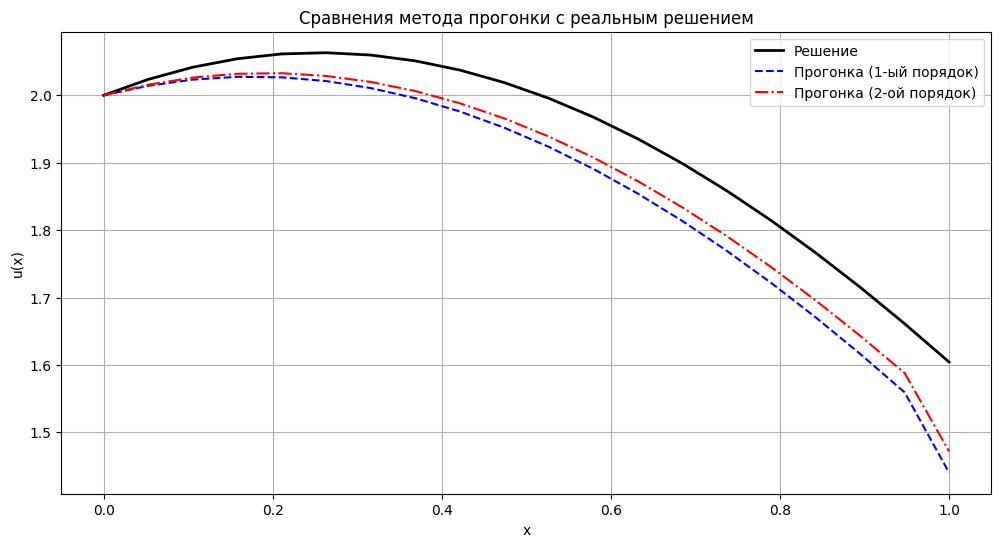

       x  Ошибка (1-ый порядок)  Ошибка (2-ой порядок)
0.000000               0.000000               0.000000
0.052632               0.009453               0.007940
0.105263               0.018375               0.015348
0.157895               0.026775               0.022232
0.210526               0.034665               0.028601
0.263158               0.042055               0.034468
0.315789               0.048960               0.039844
0.368421               0.055395               0.044743
0.421053               0.061378               0.049182
0.473684               0.066927               0.053178
0.526316               0.072066               0.056750
0.578947               0.076817               0.059921
0.631579               0.081207               0.062713
0.684211               0.085266               0.065154
0.736842               0.089024               0.067272
0.789474               0.092519               0.069097
0.842105               0.095789               0.070664
0.894737  

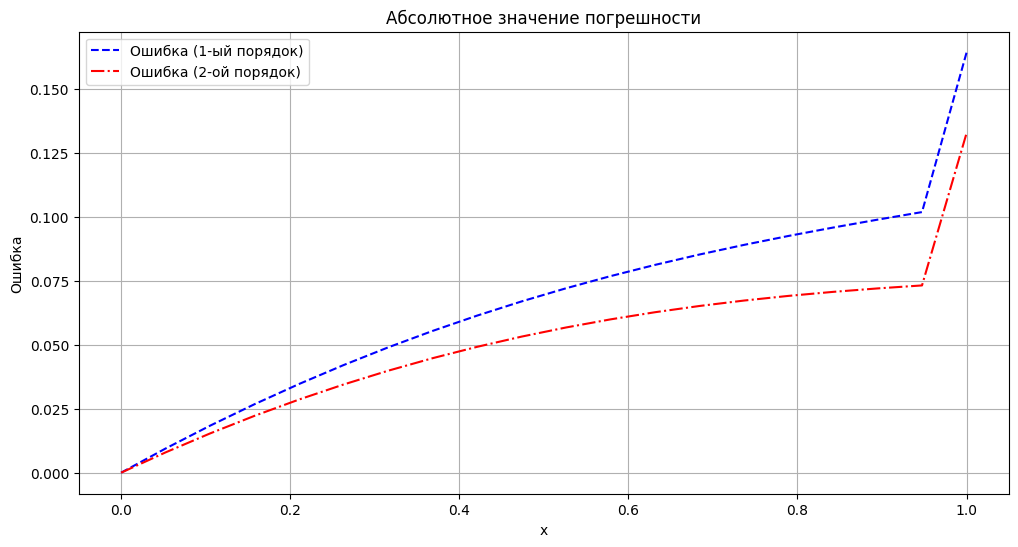

In [4]:
x0 = 0
xf = 1
h = 0.05
N = int((xf -x0)/h)  
x = np.linspace(x0, xf, N)  

u0 = 2  

a = np.zeros(N -1)  
b = np.zeros(N -1)  
c = np.zeros(N -1)  
d = np.zeros(N -1)  

for i in range(1, N):
    xi = x[i]
    pi = p(xi)
    qi = q(xi)
    fi = f_rhs(xi)

    a_i =1 + (pi * h)/2
    b_i = -2 - (qi * h**2)
    c_i =1 - (pi * h)/2
    d_i = fi * h**2

    if i ==1:
        d_i -= a_i * u0

    a[i -1] =a_i
    b[i -1] =b_i
    c[i -1] =c_i
    d[i -1] =d_i

u_first_order = first_order(x, a, b, c, d)

u_second_order = second_order(x, a, b, c, d)

exact = solution(x)

data_comparison = {
    'x': x,
    'Решение': exact,
    'Прогонка (1-ый порядок)': u_first_order,
    'Прогонка (2-ой порядок)': u_second_order
}

df_comparison = pd.DataFrame(data_comparison)

print(df_comparison.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.plot(x, exact, 'k-', label='Решение', linewidth=2)
plt.plot(x, u_first_order, 'b--', label='Прогонка (1-ый порядок)')
plt.plot(x, u_second_order, 'r-.', label='Прогонка (2-ой порядок)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Сравнения метода прогонки с реальным решением')
plt.legend()
plt.grid(True)
plt.show()

error_first_order = np.abs(u_first_order - exact)
error_second_order = np.abs(u_second_order - exact)

data_errors = {
    'x': x,
    'Ошибка (1-ый порядок)': error_first_order,
    'Ошибка (2-ой порядок)': error_second_order
}

df_errors = pd.DataFrame(data_errors)

print(df_errors.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.plot(x, error_first_order, 'b--', label='Ошибка (1-ый порядок)')
plt.plot(x, error_second_order, 'r-.', label='Ошибка (2-ой порядок)')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.title('Абсолютное значение погрешности')
plt.legend()
plt.grid(True)
plt.show()

уменьшить ошибку 